
[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


    Series1   Series2       Series3         Label
0 -3.141593 -3.141593  1.000000e-10  3.989423e+09
1 -3.141593 -3.141593  6.346652e-02  6.285870e+00
2 -3.141593 -3.141593  1.269330e-01  3.142935e+00
3 -3.141593 -3.141593  1.903996e-01  2.095290e+00
4 -3.141593 -3.141593  2.538661e-01  1.571467e+00


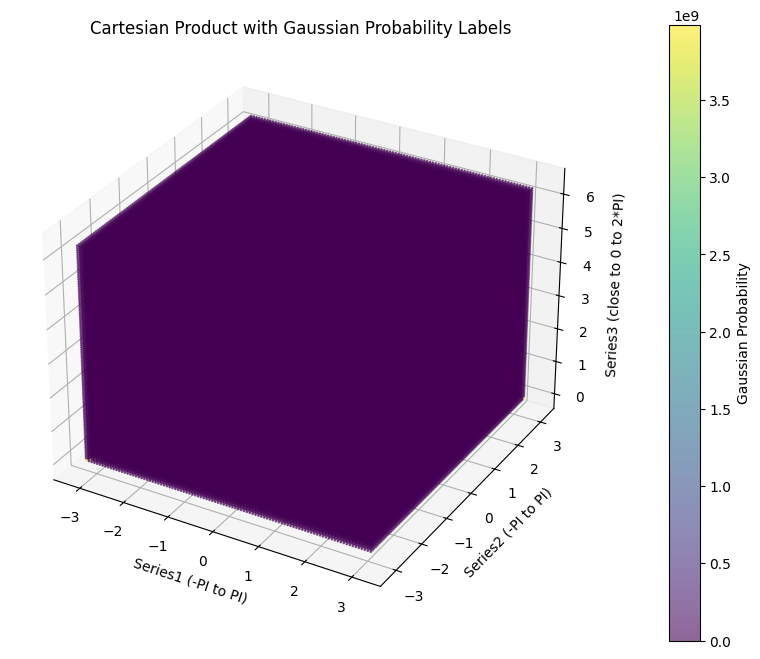

In [1]:
# Install necessary dependencies
!pip install numpy pandas matplotlib

import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt

# Step 1: Generate the series
num_values = 100

# Series 1 Input x: From -PI to +PI
series1 = np.linspace(-np.pi, np.pi, num_values)

# Series 2 Mean: From -PI to +PI
series2 = np.linspace(-np.pi, np.pi, num_values)

# Series 3 Standard deviation: From a very small number close to 0 to 2*PI
small_number = 1e-10
series3 = np.linspace(small_number, 2 * np.pi, num_values)

# Step 2: Compute the Cartesian product
cartesian_product = list(itertools.product(series1, series2, series3))

# Convert to a pandas DataFrame for better visualization
cartesian_df = pd.DataFrame(cartesian_product, columns=['Series1', 'Series2', 'Series3'])

# Step 3: Compute the labels using the Gaussian probability function
def gaussian_probability(x, y, z):
    return (1 / (np.sqrt(2 * np.pi) * z)) * np.exp(-((x - y) ** 2) / (2 * z ** 2))

cartesian_df['Label'] = cartesian_df.apply(lambda row: gaussian_probability(row['Series1'], row['Series2'], row['Series3']), axis=1)


# Display the first few rows of the DataFrame with labels
print(cartesian_df.head())

# Step 4: Plot the results
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Extract Cartesian values for plotting
x = cartesian_df['Series1']
y = cartesian_df['Series2']
z = cartesian_df['Series3']
labels = cartesian_df['Label']

# Scatter plot with color representing the labels
scatter = ax.scatter(x, y, z, c=labels, cmap='viridis', s=1, alpha=0.6)

# Add a colorbar
cbar = plt.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Gaussian Probability')

# Label the axes
ax.set_xlabel('Series1 (-PI to PI)')
ax.set_ylabel('Series2 (-PI to PI)')
ax.set_zlabel('Series3 (close to 0 to 2*PI)')

plt.title('Cartesian Product with Gaussian Probability Labels')
plt.show()


In [2]:
labels

0         3.989423e+09
1         6.285870e+00
2         3.142935e+00
3         2.095290e+00
4         1.571467e+00
              ...     
999995    6.616705e-02
999996    6.547781e-02
999997    6.480278e-02
999998    6.414153e-02
999999    6.349364e-02
Name: Label, Length: 1000000, dtype: float64

In [3]:
labels.describe()

count    1.000000e+06
mean     3.989424e+05
std      3.989225e+07
min      0.000000e+00
25%      5.351079e-02
50%      7.427056e-02
75%      1.096176e-01
max      3.989423e+09
Name: Label, dtype: float64

In [4]:
# Install necessary dependency
!pip install scikit-learn

from sklearn.model_selection import train_test_split
import os

# Step 1: Split the data into an 80/20 train/test set
train_df, test_df = train_test_split(cartesian_df, test_size=0.2, random_state=42, stratify=cartesian_df['Label'])

# Step 2: Save the datasets to files
output_folder = "./"
train_file = os.path.join(output_folder, "train_data_first.csv")
test_file = os.path.join(output_folder, "test_data_first.csv")

# Save as CSV files
train_df.to_csv(train_file, index=False)
test_df.to_csv(test_file, index=False)

print(f"Train dataset saved to {train_file}")
print(f"Test dataset saved to {test_file}")



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Train dataset saved to ./train_data_first.csv
Test dataset saved to ./test_data_first.csv


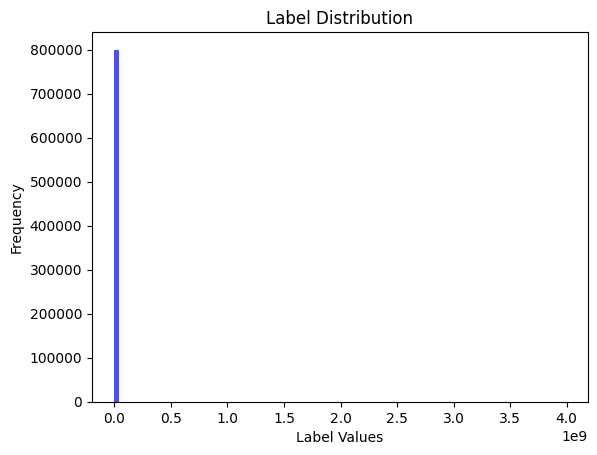

In [5]:
plt.hist(train_df['Label'], bins=100, color='blue', alpha=0.7, label='Train Data')
plt.title('Label Distribution')
plt.xlabel('Label Values')
plt.ylabel('Frequency')
plt.show()

In [6]:
import numpy as np

# Example labels (replace with your actual labels)
labels = train_df['Label']

labels.quantile(0.97)

np.float64(0.33538116205599156)

In [7]:
import numpy as np
import pandas as pd

# Assuming cartesian_df is your DataFrame with 'Label' column
# Step 1: Apply log transformation to the labels (to handle very small values)
log_labels = np.log1p(cartesian_df['Label'])  # log1p to handle values close to 0

log_labels.describe()

count    1000000.000000
mean           0.091552
std            0.239263
min            0.000000
25%            0.052128
50%            0.071642
75%            0.104015
max           22.106912
Name: Label, dtype: float64

In [8]:
log_labels.quantile(0.9985)

np.float64(0.9254956432124628)

In [9]:
from sklearn.preprocessing import StandardScaler

# Standardize the log-transformed labels
scaler = StandardScaler()
standardized_labels = scaler.fit_transform(log_labels.values.reshape(-1, 1))

# Convert back to a pandas Series for convenience
standardized_labels_series = pd.Series(standardized_labels.flatten())


In [10]:
standardized_labels_series.describe()

count    1.000000e+06
mean     4.956746e-17
std      1.000001e+00
min     -3.826432e-01
25%     -1.647733e-01
50%     -8.321582e-02
75%      5.208949e-02
max      9.201323e+01
dtype: float64

In [11]:
train_df["Label"].describe()

count    8.000000e+05
mean     3.989424e+05
std      3.989226e+07
min      0.000000e+00
25%      5.350984e-02
50%      7.427056e-02
75%      1.096176e-01
max      3.989423e+09
Name: Label, dtype: float64

In [12]:
# identify outliers
cut_off = train_df["Label"].std() * 3
data_mean = train_df["Label"].mean()
lower, upper = data_mean - cut_off, data_mean + cut_off
# identify outliers
outliers = [x for x in train_df["Label"].values if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in train_df["Label"].values if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))

outlieres_removed_series = pd.Series(outliers_removed)

Identified outliers: 80
Non-outlier observations: 799920


In [13]:
# now do the same for the outliers removed series
cut_off = outlieres_removed_series.std() * 3
data_mean = outlieres_removed_series.mean()
lower, upper = data_mean - cut_off, data_mean + cut_off
# identify outliers
outliers = [x for x in outlieres_removed_series.values if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in outlieres_removed_series.values if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))


Identified outliers: 8936
Non-outlier observations: 790984


In [14]:
outliers_removed_series2 = pd.Series(outliers_removed)
outliers_removed_series2.describe()

count    790984.000000
mean          0.088679
std           0.075084
min           0.000000
25%           0.053106
50%           0.073775
75%           0.107674
max           0.544653
dtype: float64

(array([95075., 10429.,  7690.,  7457.,  7559.,  7745.,  9394., 13312.,
        19742., 26502., 36198., 60813., 64493., 51711., 43771., 35810.,
        31375., 26506., 22800., 19948., 16953., 14848., 13309., 12278.,
        10737.,  9487.,  8744.,  7560.,  6717.,  5932.,  5532.,  6126.,
         4629.,  4511.,  3970.,  3372.,  3263.,  3072.,  3454.,  2819.,
         1989.,  2616.,  2116.,  1841.,  1829.,  1864.,  2084.,  1622.,
         1089.,  2169.,   818.,  1178.,  1543.,  1013.,  1129.,   731.,
          872.,  1263.,   582.,   890.,   977.,   441.,   739.,  1179.,
          531.,   301.,   743.,   833.,   152.,   877.,   304.,   465.,
          673.,   148.,   154.,   450.,   836.,   445.,   153.,   451.,
          303.,   305.,   390.,   148.,   305.,   297.,   452.,   304.,
          390.,     0.,   453.,     0.,     0.,   306.,   458.,   310.,
          230.,   149.,   302.,   149.]),
 array([0.        , 0.00544653, 0.01089307, 0.0163396 , 0.02178613,
        0.02723266, 0.0326

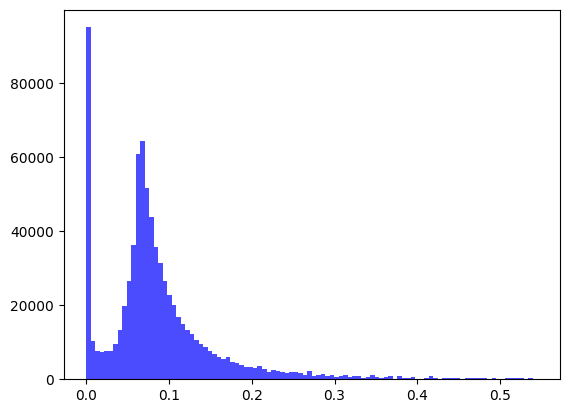

In [15]:
# plot the distribution of the outliers removed series 2
plt.hist(outliers_removed_series2, bins=100, color='blue', alpha=0.7, label='Outliers Removed')